In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import scipy.cluster.hierarchy as sch
import plotly.express as px

from sklearn.preprocessing import StandardScaler

In [2]:
# Read Data
dataset = pd.read_csv("Country-data.csv")
info = pd.read_csv("data-dictionary.csv")

### Data Understanding

In [3]:
info

Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...

In [4]:
dataset.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
dataset.shape

(167, 10)

In [7]:
dataset.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [8]:
dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
dataset['country'].nunique()

167

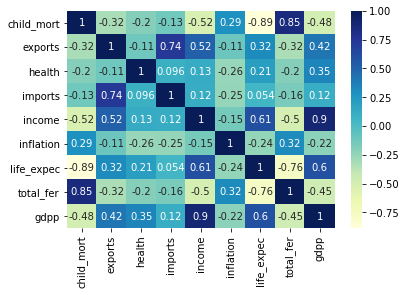

In [10]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

From above we can conclude that:

1. gdpp and income,life_expec, and exports are highly positive correlated

2. whereas total_fer and child_mort are highly negative correlated

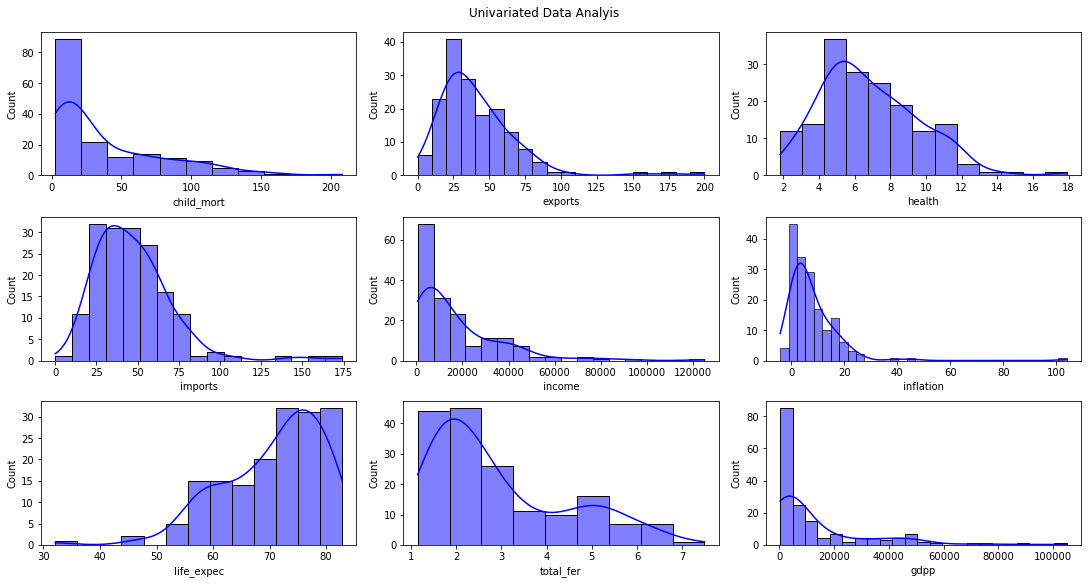

In [11]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= dataset.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(dataset[i], ax=ax[x], kde=True, color='blue')

In [12]:
for i in int_cols:
    fig=px.choropleth(data_frame=dataset, locationmode='country names', locations='country', color=i, title=f'{i} rate by countries')
    fig.show()

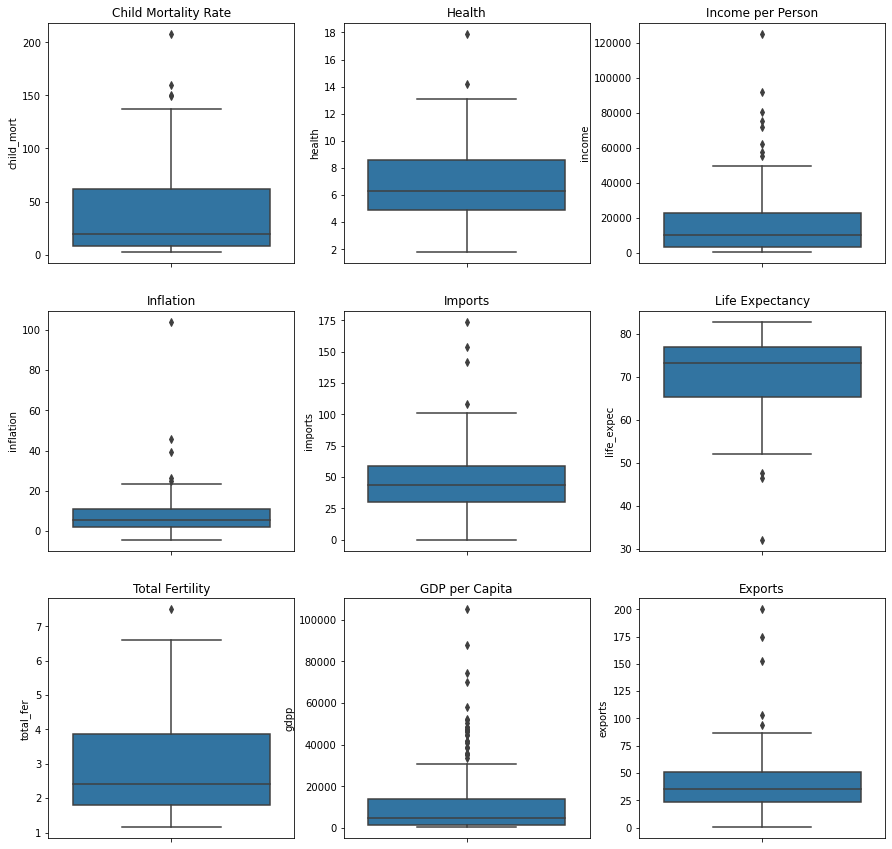

In [13]:
#box plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=dataset.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=dataset.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=dataset.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=dataset.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=dataset.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=dataset.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=dataset.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=dataset.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=dataset.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

From above analyse we can see that there are many outliers in the dataset.
Most of the outliers are in income per person,GDP per captia and Exports.

However, we are not going to remove the outliers as our dataset is very small (167 rows only) and these informations could be considered very informative that could point out countries that are in critical condition and in need of help.

### Data Preparation

#### Dropping Unnecessary Columns

In [14]:
#drop country column
df=dataset.drop(['country'],axis=1)

In [15]:
df.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

As country column is unnecessary, this column will be removed from the dataset for better performance.

#### Scaling Data

In [16]:
# feature scaling
sc = StandardScaler()
scaled = sc.fit_transform(df)

sc_dataset = pd.DataFrame(scaled,columns=df.columns)
sc_dataset.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

### Building Model  - K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

Using Elbow Method to decide the number of cluster.

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



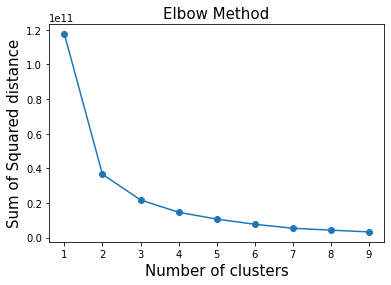

In [18]:
# plot elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

From the Elbow Method plot, we can see the elbow or a knee like bend is at 3.
Hence, number of cluster - 3 will be used in implementing K-Means Clustering.

In [19]:
kmeans = KMeans(n_clusters = 3,random_state = 80)
kmeans_model = kmeans.fit(sc_dataset)

In [20]:
y_kmeans = kmeans_model.predict(sc_dataset)
y_kmeans

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [21]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

1    84
0    47
2    36
dtype: int64

In [22]:
kmeans_df = pd.DataFrame(dataset)
kmeans_df['KMeans_Clusters'] = y_kmeans
kmeans_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  KMeans_Clusters  
0       9.44        56.2       5.82    553                0  
1       4.49        76.3       1.65   4090                1  
2      16.10        76.5       2.89   4460                1  
3      22.40        60.1       6.16   3530                0  
4       1.44        76.8       2.13  12200                1

### Model Evaluation

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
labels = kmeans_model.labels_

print('Silhoutte score of K-Means Clustering model is ' + str(silhouette_score(sc_dataset, labels, metric = 'euclidean')))

Silhoutte score of K-Means Clustering model is 0.28329575683463126


### Visualization of clusteres

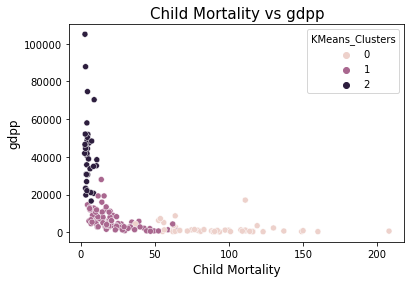

In [24]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['child_mort'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and high child-mortality are classified as **under-developing country**
* Country having high GDP and low child-mortality are classified as **developed country**

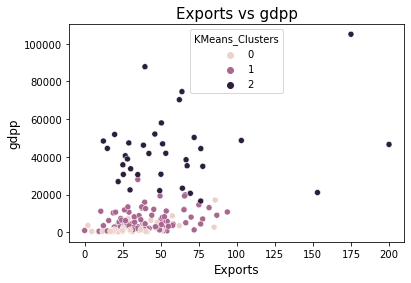

In [25]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['exports'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Exports vs gdpp", fontsize=15)
plt.xlabel("Exports", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and low export are classified as **under-developing country**
* Country having high GDP and high export are classified as **developed country**

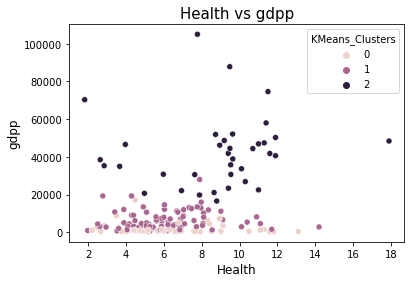

In [26]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['health'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Health vs gdpp", fontsize=15)
plt.xlabel("Health", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* **Under-developing country** having low GDP and poor health conditions.

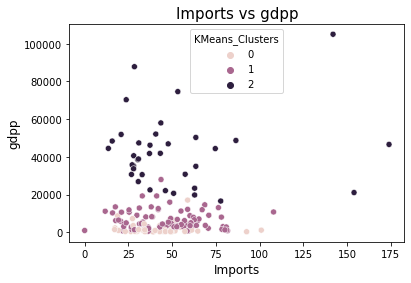

In [27]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['imports'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Imports vs gdpp", fontsize=15)
plt.xlabel("Imports", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and low import are classified as **under-developing country**
* Country having high GDP and high import are classified as **developed country**

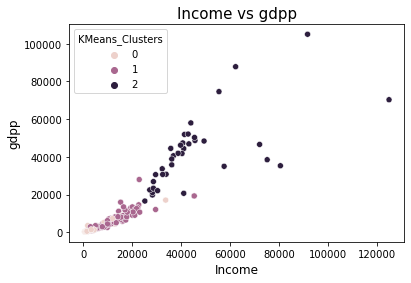

In [28]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['income'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Income vs gdpp", fontsize=15)
plt.xlabel("Income", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and low income are classified as **under-developing country**
* Country having high GDP and high income are classified as **developed country**

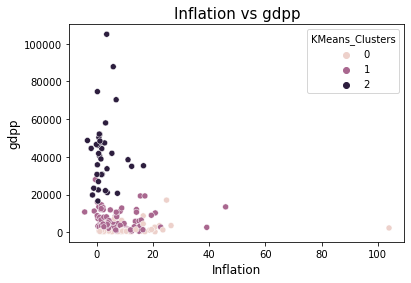

In [29]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['inflation'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

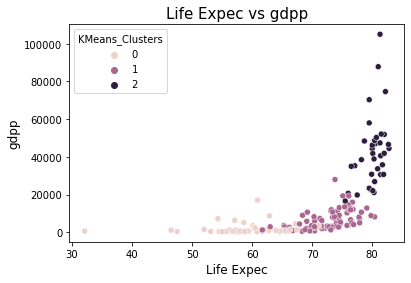

In [30]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['life_expec'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Life Expec vs gdpp", fontsize=15)
plt.xlabel("Life Expec", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and low life expec are classified as **under-developing country**
* Country having high GDP and high life expec are classified as **developed country**

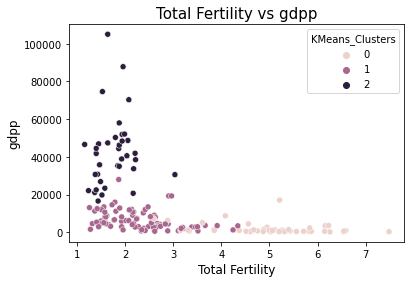

In [31]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['total_fer'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Total Fertility vs gdpp", fontsize=15)
plt.xlabel("Total Fertility", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and high fertility rates are classified as **under-developing country**
* Country having high GDP and low fertility rates are classified as **developed country**

From above clusters graph we can conclude that

0 = under-developing country

1 = developing country

2 = developed country

In [32]:
#find number of developed country,developing country,under-developed country
under_developing=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developed=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']

print("Number of under-developing countries: ",len(under_developing))
print("Number of developing countries: ",len(developing))
print("Number of developed countries: ",len(developed))

Number of under-developing countries:  47
Number of developing countries:  84
Number of developed countries:  36


### Overall Analysis

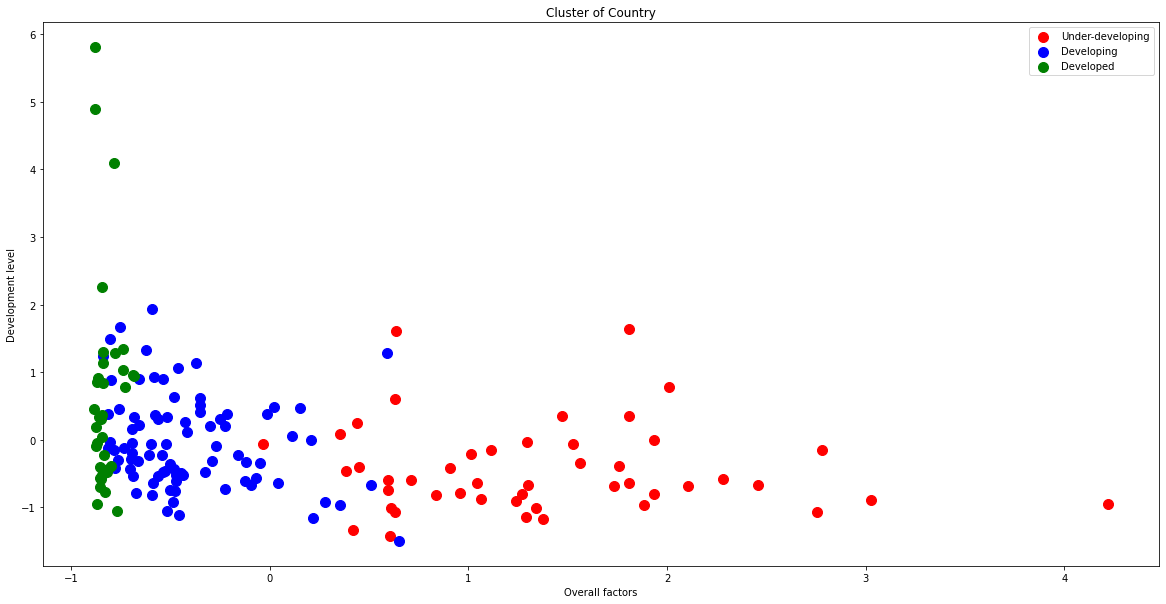

In [33]:
x=sc_dataset.values

plt.figure(figsize=(20,10))

plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100,c='red',label='Under-developing')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,c='blue',label='Developing')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],s=100,c='green',label='Developed')

plt.title('Cluster of Country')
plt.xlabel('Overall factors')
plt.ylabel('Development level')
plt.legend()
plt.show()

In [34]:
#df['KMean_labels']=df['KMean_labels'].astype('category')
cat = {0:'Under-Developing',1:'Developing',2:'Developed'}
kmeans_df['KMeans_Clusters']=kmeans_df['KMeans_Clusters'].map(cat)

px.choropleth(data_frame=kmeans_df, locationmode='country names', locations='country', color=kmeans_df['KMeans_Clusters'], title='Development Of Countries',
              color_discrete_map={'Under-Developing':'#DB1C18','Developing':'#DBDB3B','Developed':'#51A2DB'} , projection='equirectangular')

### Building Model  - Hierarchical Clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering

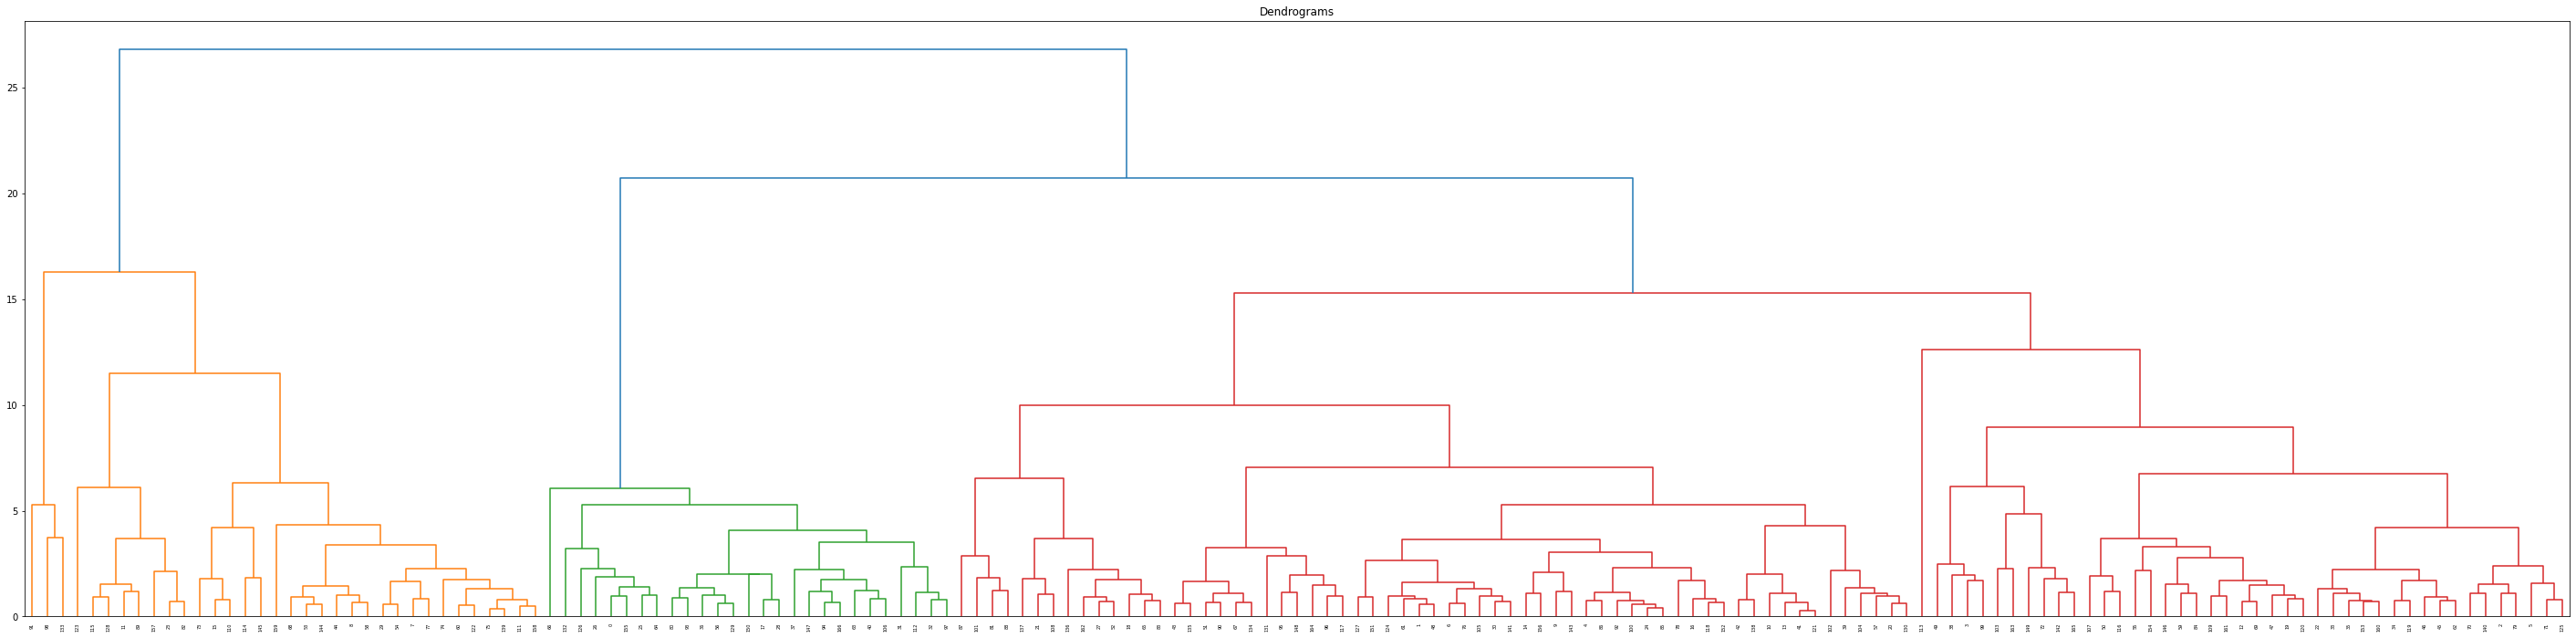

In [36]:
#plotting dendogram
plt.figure(figsize=(50, 12))
plt.title("Dendrograms")
dendrogram=sch.dendrogram(sch.linkage(sc_dataset,method='ward'))

* Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

From above dendogram we can take minimum no of clusters as 2 and maximum number of cluster as 5.The idea of optimal number is the number of cluster that going through the horizontal line. Hence, the ideal number of clusters will be 3 by using the Dendogram Method.

In [37]:
hc= AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [38]:
y_hc = hc.fit_predict(sc_dataset)
y_hc

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [39]:
#count number of records in every cluster
pd.Series(hc.labels_).value_counts()

1    106
0     34
2     27
dtype: int64

In [40]:
hc_df = pd.DataFrame(dataset)
hc_df['hc_Clusters'] = y_hc
hc_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp   KMeans_Clusters  hc_Clusters  
0       9.44        56.2       5.82    553  Under-Developing            2  
1       4.49        76.3       1.65   4090        Developing            1  
2      16.10        76.5       2.89   4460        Developing            1  
3      22.40        60.1       6.16   3530  Under-Developing            1  
4       1.44        76.8       2.13  12200        Developing            1

### Visualization of hcluster

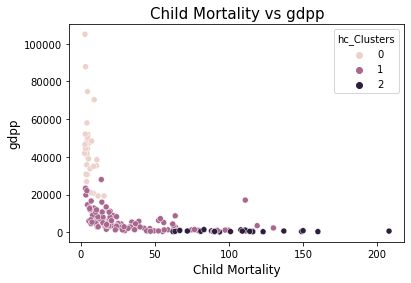

In [41]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(x=hc_df['child_mort'],y=hc_df['gdpp'],hue='hc_Clusters',data=hc_df)
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and high child-mortality are classified as **under-developing country**
* Country having high GDP and low child-mortality are classified as **developed country**

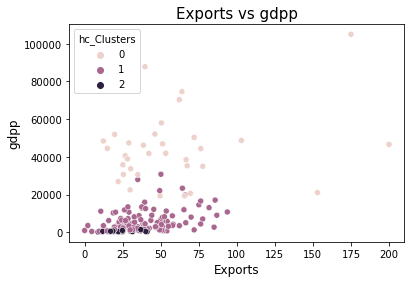

In [42]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(x=hc_df['exports'],y=hc_df['gdpp'],hue='hc_Clusters',data=hc_df)
plt.title("Exports vs gdpp", fontsize=15)
plt.xlabel("Exports", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and low export are classified as **under-developing country**
* Country having high GDP and high export are classified as **developed country**

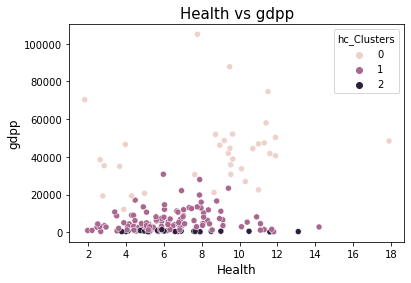

In [43]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(x=hc_df['health'],y=hc_df['gdpp'],hue='hc_Clusters',data=hc_df)
plt.title("Health vs gdpp", fontsize=15)
plt.xlabel("Health", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* **Under-developing country** having low GDP and poor health conditions.

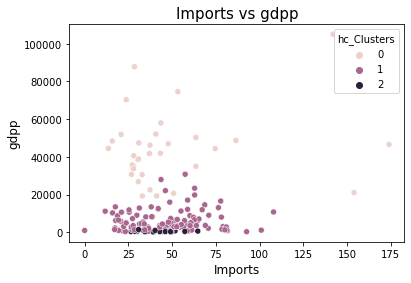

In [44]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(x=hc_df['imports'],y=hc_df['gdpp'],hue='hc_Clusters',data=hc_df)
plt.title("Imports vs gdpp", fontsize=15)
plt.xlabel("Imports", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and low import are classified as **under-developing country**
* Country having high GDP and high import are classified as **developed country**

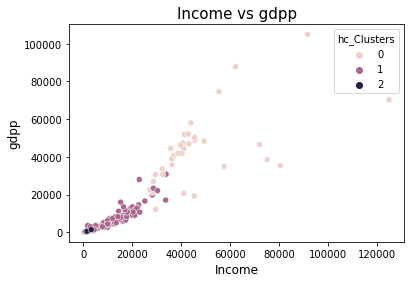

In [45]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(x=hc_df['income'],y=hc_df['gdpp'],hue='hc_Clusters',data=hc_df)
plt.title("Income vs gdpp", fontsize=15)
plt.xlabel("Income", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and low income are classified as **under-developing country**
* Country having high GDP and high income are classified as **developed country**

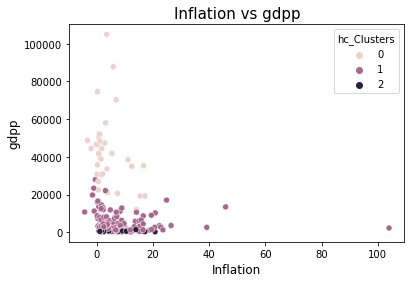

In [46]:
#visulazing hcluster results
sns.scatterplot(x=hc_df['inflation'],y=hc_df['gdpp'],hue='hc_Clusters',data=hc_df)
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

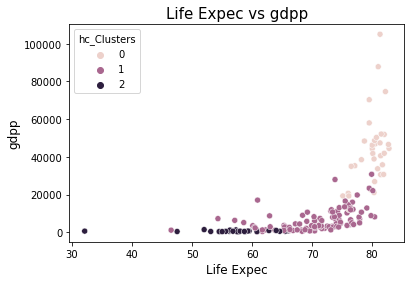

In [47]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(x=hc_df['life_expec'],y=hc_df['gdpp'],hue='hc_Clusters',data=hc_df)
plt.title("Life Expec vs gdpp", fontsize=15)
plt.xlabel("Life Expec", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and low life expec are classified as **under-developing country**
* Country having high GDP and high life expec are classified as **developed country**

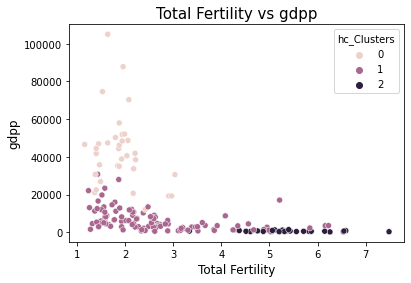

In [48]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(x=hc_df['total_fer'],y=hc_df['gdpp'],hue='hc_Clusters',data=hc_df)
plt.title("Total Fertility vs gdpp", fontsize=15)
plt.xlabel("Total Fertility", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

* Country having low GDP and high fertility rates are classified as **under-developing country**
* Country having high GDP and low fertility rates are classified as **developed country**

From above clusters graph we can conclude that

0 = developed country

1 = developing country

2 = under-developing country

In [49]:
#find number of developed country,developing country,under-developed country
developed=hc_df[hc_df['hc_Clusters']==0]['country']
developing=hc_df[hc_df['hc_Clusters']==1]['country']
under_developing=hc_df[hc_df['hc_Clusters']==2]['country']

print("Number of under-developing countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of developed countries",len(developed))

Number of under-developing countries 27
Number of developing countries 106
Number of developed countries 34


### Overall Analysis

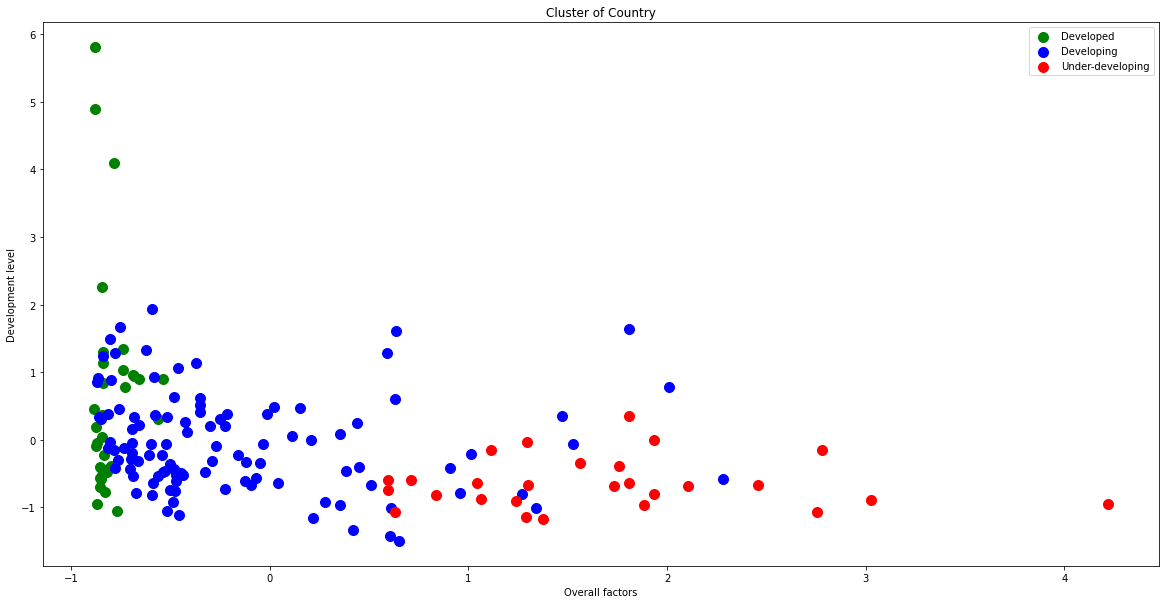

In [50]:
x=sc_dataset.values

plt.figure(figsize=(20,10))

plt.scatter(x[y_hc==0,0], x[y_hc==0,1],s=100,c='green',label='Developed')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1],s=100,c='blue',label='Developing')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1],s=100,c='red',label='Under-developing')

plt.title('Cluster of Country')
plt.xlabel('Overall factors')
plt.ylabel('Development level')
plt.legend()
plt.show()

In [51]:
cat = {0:'Developed',1:'Developing',2:'Under-developing'}
hc_df['hc_Clusters']=hc_df['hc_Clusters'].map(cat)

px.choropleth(data_frame=hc_df, locationmode='country names', locations='country', color=hc_df['hc_Clusters'], title='Development Of Countries',
              color_discrete_map={'Developed':'#51A2DB','Developing':'#DBDB3B','Under-developing':'#DB1C18'} , projection='equirectangular')